### Web Scraping
It is an automatic way to retrieve unstructured data from a website and store them in a structured format.It involves retrieving and parsing the content of web pages to extract structured data that can be further analyzed, stored, or used for various purposes. Web scraping is a valuable technique for a wide range of applications, including data collection, market research, competitive analysis, content aggregation, and more.

Here are the key components and steps involved in web scraping:
+ HTTP Request: The process begins with sending an HTTP request to a specific URL (Uniform Resource Locator), which is the web address of the target website. This request is typically made using libraries like requests in Python.

+ Downloading Web Pages: Once the request is sent and the server responds, the web page's HTML content is downloaded. This HTML content contains the structure and data of the webpage.

+ HTML Parsing: The downloaded HTML content is then parsed using an HTML parser library like BeautifulSoup in Python. Parsing involves breaking down the HTML code into a structured format that can be easily navigated and searched.

+ Data Extraction: After parsing, web scraping scripts can locate and extract specific pieces of information from the HTML, such as text, images, links, tables, and more. These data elements are often identified using HTML tags, attributes, and class names.

+ Data Transformation: Extracted data may need to be cleaned and transformed into a structured format, such as a CSV file, JSON, or a database, depending on the intended use.

+ Storing Data: The scraped data can be stored in a local file or database for further analysis, reporting, or visualization.

+ Automation: Web scraping can be automated to collect data from multiple pages or websites by iterating through URLs or following links within the pages.

Web scraping is a powerful tool but should be used responsibly and ethically. Website owners may have terms of service that restrict or prohibit scraping, so it's important to review and adhere to a website's policies and guidelines. Additionally, web scraping should be performed in a manner that does not overload or disrupt the target website's servers (this is known as "ethical scraping").

Web scraping can be accomplished using various programming languages and libraries, with Python being one of the most popular choices due to its rich ecosystem of web scraping tools and libraries like BeautifulSoup and Scrapy.

In [1]:
# Import libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
# Headers
headers={
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
}

Defining a user-agent header to mimic a web browser's request to Amazon.

In [3]:
# Initialize list to store reviews data later on
reviewlist=[]

# Function 1: get and return parsed HTML
def get_soup(url):
    r=requests.get(url,headers=headers)
    soup=BeautifulSoup(r.text,'html.parser')
    return soup

Creating an empty list called reviewlist to store scraped review data.

Function takes a URL as input, sends an HTTP GET request to the URL with the specified headers, and parses the HTML content using BeautifulSoup. It then returns the parsed soup object.

In [4]:
# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews=soup.find_all('div',{'data-hook':'review'})
    try:
        for item in reviews:
            review={
                'product': soup.title.text.replace('Amazon.ca:Customer reviews: ','').strip(),
                'date':item.find('span',{'data-hook':'review-date'}).text.strip(),
                'title':item.find('a',{'data-hook':'review-title'}).text.strip(),
                'rating':float(item.find('i',{'data-hook':'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                'body':item.find('span',{'data-hook':'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except Exception as e:
        print(f"An error occurred:{str(e)}")

This function extracts review information from the parsed HTML soup. It searches for HTML elements that contain review data, extracts details such as product name, date, title, rating, and body of the review, and appends this information to the reviewlist.

##### Looping through multiple pages
One of the easiest methods to scrape multiple pages is to modify the base URL to accept a page variable that increments as needed.For Amazon product reviews, the only thing that seems to change is the number indicating which page it is.

In [5]:
# Looping through multiple pages
for x in range(1,20):
    url=f'https://www.amazon.in/Sony-WH-1000XM3-Wireless-Cancellation-Headphones/product-reviews/B07HZ8JWCL'
    soup=get_soup(url)
    print(f'Getting page:{x}')
    get_reviews(soup)
    print(len(reviewlist))
    next_button=soup.find('li',{'class':'a-disabled a-last'})
    if not next_button:
        pass
    else:
        break

Getting page:1
0
Getting page:2
10
Getting page:3
20
Getting page:4
30
Getting page:5
30
Getting page:6
40
Getting page:7
40
Getting page:8
40
Getting page:9
40
Getting page:10
40
Getting page:11
40
Getting page:12
50
Getting page:13
60
Getting page:14
60
Getting page:15
60
Getting page:16
70
Getting page:17
80
Getting page:18
80
Getting page:19
80


This section loops through multiple pages of Amazon reviews. It starts from page 1 and continues until either 20 pages have been scraped or the "next page" button is disabled. For each page, it calls the get_soup function to fetch the HTML, then calls get_reviews to extract review data and appends it to reviewlist.

In [6]:
# Save results to a dataframe, then export as CSV
df=pd.DataFrame(reviewlist)
df.to_csv('Amazon_Reviews_Sony_WH-1000XM3.csv',index=False)

After scraping, the script saves the collected review data to a CSV file named 'Amazon_Reviews_Sony_WF-1000XM3.csv' and also reads the CSV file back into a DataFrame for further analysis.

In [7]:
# Read the CSV into a DataFrame
review_df=pd.read_csv('Amazon_Reviews_Sony_WH-1000XM3.csv')
review_df.head()

,product,date,title,rating,body
0,Amazon.in:Customer reviews: Sony WH-1000XM3 Bl...,Reviewed in India on 18 August 2019,"5.0 out of 5 stars\nBetter than ATH M50x, Senn...",5.0,I have Audio Technica ATH M50x and Sennheiser ...
1,Amazon.in:Customer reviews: Sony WH-1000XM3 Bl...,Reviewed in India on 9 August 2020,5.0 out of 5 stars\nBeats the competition,5.0,"Before I start with the review, let me make it..."
2,Amazon.in:Customer reviews: Sony WH-1000XM3 Bl...,Reviewed in India on 23 November 2018,5.0 out of 5 stars\nExpensive but the way to g...,5.0,This is my FIRST Noise Cancellation Headphones...
3,Amazon.in:Customer reviews: Sony WH-1000XM3 Bl...,Reviewed in India on 19 October 2018,5.0 out of 5 stars\nUnique and awesome but can...,5.0,Reached before 12pm today on 19th. Awesome del...
4,Amazon.in:Customer reviews: Sony WH-1000XM3 Bl...,Reviewed in India on 25 August 2020,4.0 out of 5 stars\nRecommended For Noise Canc...,4.0,I was a bit skeptical about buying this after ...


###### Data Understanding

In [8]:
review_df.shape

(80, 5)

In [9]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   product  80 non-null     object 
 1   date     80 non-null     object 
 2   title    80 non-null     object 
 3   rating   80 non-null     float64
 4   body     80 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.2+ KB


In [10]:
review_df.isnull().sum()

product    0
date       0
title      0
rating     0
body       0
dtype: int64

In [11]:
review_df.rating.describe()

count    80.000000
mean      4.400000
std       1.207571
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: rating, dtype: float64

In [12]:
review_df['word_count']=review_df['body'].apply(lambda x:len(str(x).split(" ")))
review_df[['body','word_count']].head()

,body,word_count
0,I have Audio Technica ATH M50x and Sennheiser ...,1242
1,"Before I start with the review, let me make it...",1082
2,This is my FIRST Noise Cancellation Headphones...,517
3,Reached before 12pm today on 19th. Awesome del...,945
4,I was a bit skeptical about buying this after ...,645


In [13]:
review_df['char_count']=review_df['body'].str.len() ## this also includes spaces
review_df[['body','char_count']].head()

,body,char_count
0,I have Audio Technica ATH M50x and Sennheiser ...,7238
1,"Before I start with the review, let me make it...",6166
2,This is my FIRST Noise Cancellation Headphones...,2800
3,Reached before 12pm today on 19th. Awesome del...,4960
4,I was a bit skeptical about buying this after ...,3587


In [14]:
def avg_word(sentence):
  words=str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

review_df['avg_word']=review_df['body'].apply(lambda x:avg_word(x))
review_df[['body','avg_word']].head()

,body,avg_word
0,I have Audio Technica ATH M50x and Sennheiser ...,4.828502
1,"Before I start with the review, let me make it...",4.703978
2,This is my FIRST Noise Cancellation Headphones...,4.417795
3,Reached before 12pm today on 19th. Awesome del...,4.393873
4,I was a bit skeptical about buying this after ...,4.562791


In [15]:
from nltk.corpus import stopwords
stop=stopwords.words('english')

review_df['stopwords']=review_df['body'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
review_df[['body','stopwords']].head()

,body,stopwords
0,I have Audio Technica ATH M50x and Sennheiser ...,466
1,"Before I start with the review, let me make it...",444
2,This is my FIRST Noise Cancellation Headphones...,207
3,Reached before 12pm today on 19th. Awesome del...,391
4,I was a bit skeptical about buying this after ...,254


In [16]:
review_df['hashtags']=review_df['body'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
review_df[['body','hashtags']].head()

,body,hashtags
0,I have Audio Technica ATH M50x and Sennheiser ...,0
1,"Before I start with the review, let me make it...",0
2,This is my FIRST Noise Cancellation Headphones...,0
3,Reached before 12pm today on 19th. Awesome del...,0
4,I was a bit skeptical about buying this after ...,0


In [17]:
import string

#Function to count special characters in a text
def count_special_characters(text):
    special_chars=set(string.punctuation)
    num_special_chars=sum(1 for char in text if char in special_chars)
    return num_special_chars

review_df['Num_Special_Characters']=review_df['body'].apply(count_special_characters)
review_df[['body','Num_Special_Characters']].head()

,body,Num_Special_Characters
0,I have Audio Technica ATH M50x and Sennheiser ...,239
1,"Before I start with the review, let me make it...",281
2,This is my FIRST Noise Cancellation Headphones...,104
3,Reached before 12pm today on 19th. Awesome del...,106
4,I was a bit skeptical about buying this after ...,121


In [18]:
review_df['numerics']=review_df['body'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
review_df[['body','numerics']].head()

,body,numerics
0,I have Audio Technica ATH M50x and Sennheiser ...,10
1,"Before I start with the review, let me make it...",31
2,This is my FIRST Noise Cancellation Headphones...,3
3,Reached before 12pm today on 19th. Awesome del...,1
4,I was a bit skeptical about buying this after ...,0


In [19]:
review_df['upper']=review_df['body'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
review_df[['body','upper']].head()

,body,upper
0,I have Audio Technica ATH M50x and Sennheiser ...,50
1,"Before I start with the review, let me make it...",66
2,This is my FIRST Noise Cancellation Headphones...,30
3,Reached before 12pm today on 19th. Awesome del...,26
4,I was a bit skeptical about buying this after ...,26


###### Data Pre-processing

In [20]:
from textblob import TextBlob
review_df['body'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I have Studio Technical ATH M50x and Sennheise...
1    Before I start with the review, let me make it...
2    His is my FIRST Noise Cancellation Headphones!...
3    Reached before pm today on with. Awesome deliv...
4    I was a bit skeptically about buying this afte...
Name: body, dtype: object

######  Feature Engineering

In [21]:
print(review_df['date'].str.split(' ').str[0],'\n',
      review_df['date'].str.split(' ').str[1],'\n',
      review_df['date'].str.split(' ').str[2],'\n',
      review_df['date'].str.split(' ').str[3],'\n',
      review_df['date'].str.split(' ').str[4],'\n',
      review_df['date'].str.split(' ').str[5],'\n',
      review_df['date'].str.split(' ').str[6])

0     Reviewed
1     Reviewed
2     Reviewed
3     Reviewed
4     Reviewed
        ...   
75    Reviewed
76    Reviewed
77    Reviewed
78    Reviewed
79    Reviewed
Name: date, Length: 80, dtype: object 
 0     in
1     in
2     in
3     in
4     in
      ..
75    in
76    in
77    in
78    in
79    in
Name: date, Length: 80, dtype: object 
 0     India
1     India
2     India
3     India
4     India
      ...  
75    India
76    India
77    India
78    India
79    India
Name: date, Length: 80, dtype: object 
 0     on
1     on
2     on
3     on
4     on
      ..
75    on
76    on
77    on
78    on
79    on
Name: date, Length: 80, dtype: object 
 0     18
1      9
2     23
3     19
4     25
      ..
75     7
76    13
77    31
78    14
79     6
Name: date, Length: 80, dtype: object 
 0       August
1       August
2     November
3      October
4       August
        ...   
75        July
76       April
77        July
78        July
79    November
Name: date, Length: 80, dtype: object 
 0

In [22]:
data=review_df.copy()
data['Day']=data['date'].str.split(' ').str[4]
data['Month']=data['date'].str.split(' ').str[5]
data['Year']=data['date'].str.split(' ').str[6]
data[['Day','Month','Year']]

,Day,Month,Year
0,18,August,2019
1,9,August,2020
2,23,November,2018
3,19,October,2018
4,25,August,2020
...,...,...,...
75,7,July,2020
76,13,April,2019
77,31,July,2023
78,14,July,2022


In [23]:
data.Month.value_counts()

August      24
July        24
November    16
October      8
April        8
Name: Month, dtype: int64

In [24]:
# Change 'month' from words to numbers for easier analysis
order={'Month':{'April':4,'July':7,'August':8,'October':10,'November':11}}
df1=data.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,8
1,8
2,11
3,10
4,8
...,...
75,7
76,4
77,7
78,7


In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product                 80 non-null     object 
 1   date                    80 non-null     object 
 2   title                   80 non-null     object 
 3   rating                  80 non-null     float64
 4   body                    80 non-null     object 
 5   word_count              80 non-null     int64  
 6   char_count              80 non-null     int64  
 7   avg_word                80 non-null     float64
 8   stopwords               80 non-null     int64  
 9   hashtags                80 non-null     int64  
 10  Num_Special_Characters  80 non-null     int64  
 11  numerics                80 non-null     int64  
 12  upper                   80 non-null     int64  
 13  Day                     80 non-null     object 
 14  Month                   80 non-null     int6

In [26]:
df1[['Day','Year']]=df1[['Day','Year']].astype('int64')

In [27]:
df1.drop(['product','date','word_count','char_count','avg_word','stopwords','hashtags','Num_Special_Characters','numerics','upper'],axis=1, inplace=True)
df1.head()

,title,rating,body,Day,Month,Year
0,"5.0 out of 5 stars\nBetter than ATH M50x, Senn...",5.0,I have Audio Technica ATH M50x and Sennheiser ...,18,8,2019
1,5.0 out of 5 stars\nBeats the competition,5.0,"Before I start with the review, let me make it...",9,8,2020
2,5.0 out of 5 stars\nExpensive but the way to g...,5.0,This is my FIRST Noise Cancellation Headphones...,23,11,2018
3,5.0 out of 5 stars\nUnique and awesome but can...,5.0,Reached before 12pm today on 19th. Awesome del...,19,10,2018
4,4.0 out of 5 stars\nRecommended For Noise Canc...,4.0,I was a bit skeptical about buying this after ...,25,8,2020


###### Data Visualization

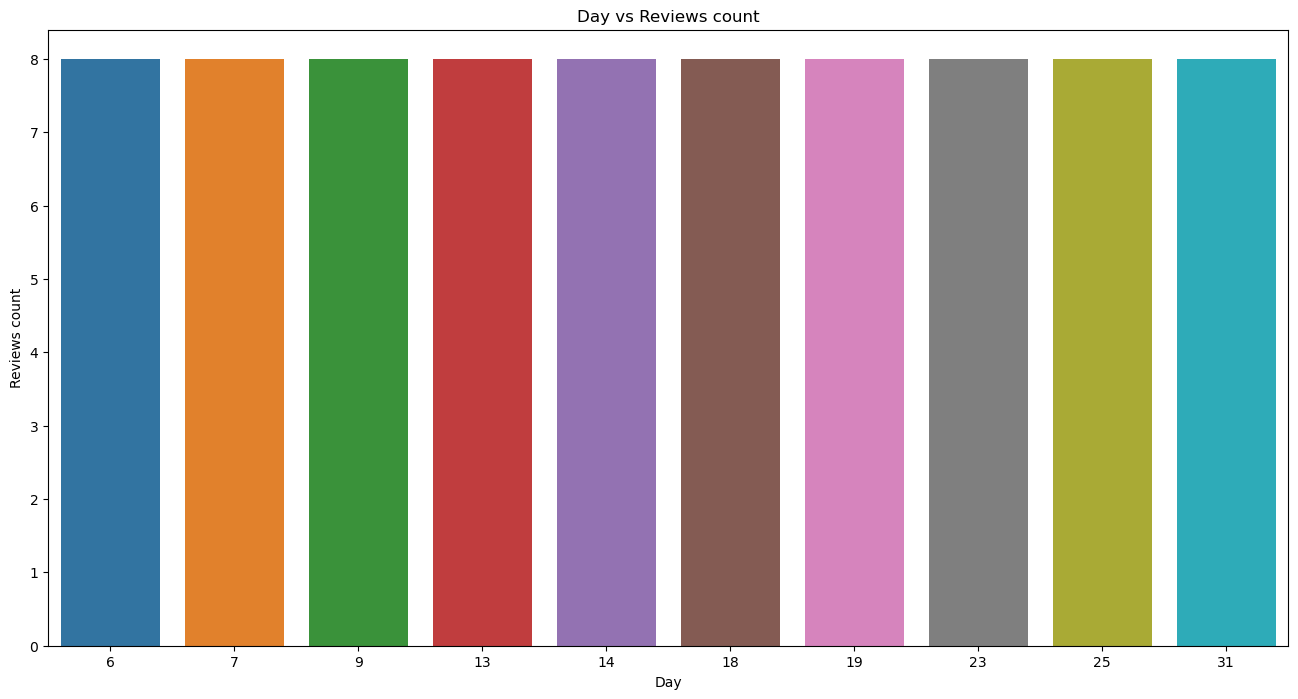

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

#Creating a dataframe
dayreview=pd.DataFrame(df1.groupby('Day')['body'].count()).reset_index()
dayreview['Day']=dayreview['Day'].astype('int64')
dayreview.sort_values(by=['Day'])

#Plotting the graph
plt.figure(figsize=(16,8))
sns.barplot(x ="Day",y ="body",data=dayreview)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

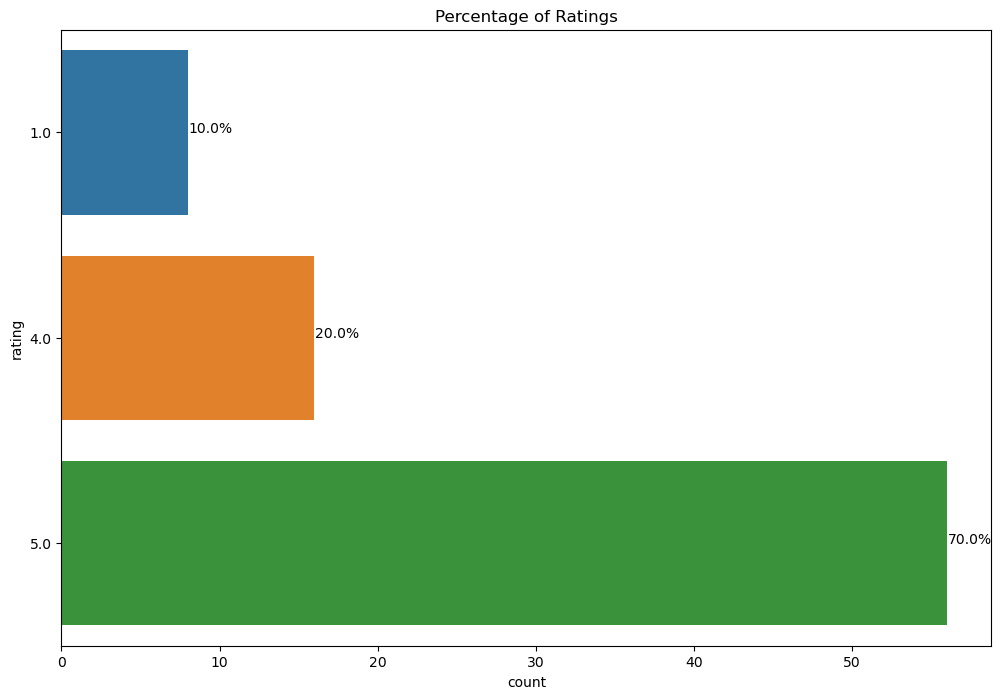

In [29]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax=sns.countplot(y ='rating',data=df1)
total=len(df1)
for p in ax.patches:
        percentage='{:.1f}%'.format(100 * p.get_width()/total)
        x=p.get_x()+p.get_width()+0.02
        y=p.get_y()+p.get_height()/2
        ax.annotate(percentage,(x, y))

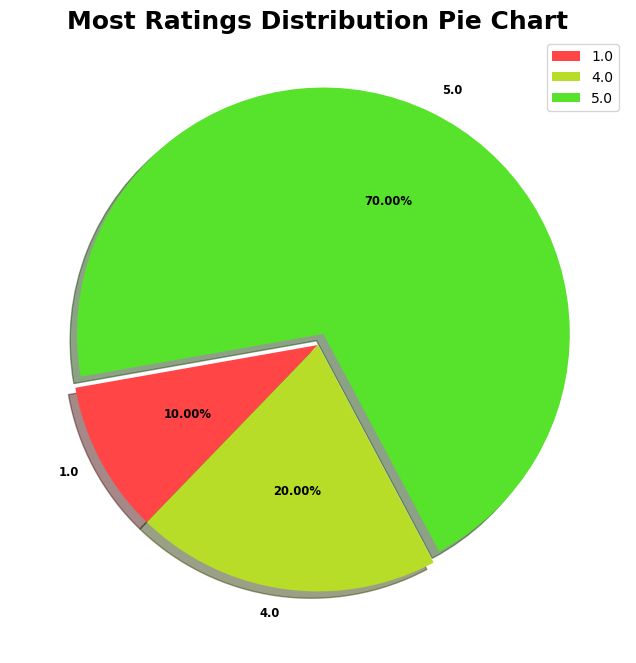

In [30]:
plt.figure(figsize=(12,8))
plt.pie(df1['rating'].value_counts().sort_index(),
       labels=df1['rating'].value_counts().sort_index().index,
       explode=[0.00,0.0,0.05],
       autopct='%.2f%%',
        colors=["#ff4545",'#b7dd29','#57e32c'],
       shadow=True,
       startangle=190,
       textprops={'size':'small',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.title("Most Ratings Distribution Pie Chart",fontsize=18,fontweight='bold')
plt.show()

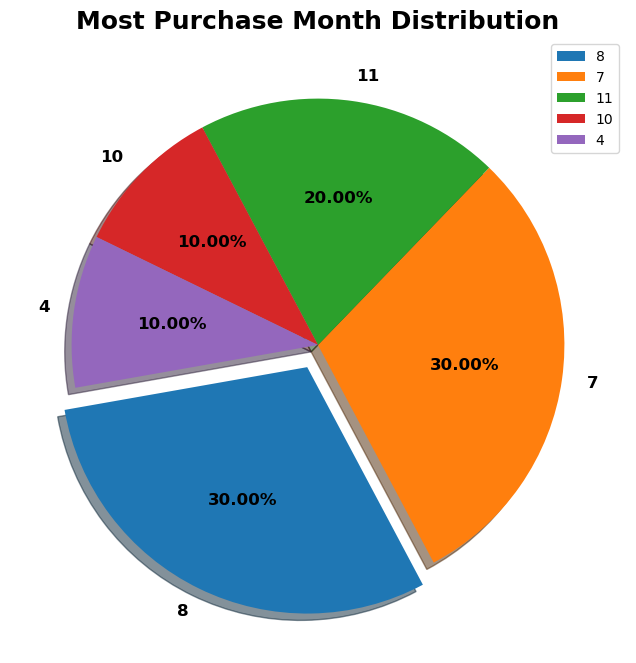

In [31]:
plt.figure(figsize=(12,8))
plt.pie(df1['Month'].value_counts(),
       labels=df1['Month'].value_counts().index,
       explode=[0.1,0.0,0.0,0.0,0.0],
       autopct='%.2f%%',
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.title("Most Purchase Month Distribution",fontsize=18,fontweight='bold')
plt.show()

Most purchased months are July and August.
Least purchased months are April and October.

###### BasicText Preprocessing

In [32]:
Review=df1[['body']]
Review

,body
0,I have Audio Technica ATH M50x and Sennheiser ...
1,"Before I start with the review, let me make it..."
2,This is my FIRST Noise Cancellation Headphones...
3,Reached before 12pm today on 19th. Awesome del...
4,I was a bit skeptical about buying this after ...
...,...
75,The ProblemIt was about a few months ago that ...
76,"Prior to purchasing this product, I was a tad ..."
77,Best headphones
78,"When you listen to music, not many people unde..."


In [33]:
stop_words=stopwords.words('english')
Review['body']=Review['body'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

C:\Users\Linta Stephen\AppData\Local\Temp\ipykernel_7728\2834739990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Review['body']=Review['body'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \


In [34]:
Review

,body
0,i audio technica ath m50x sennheiser hd598 hea...
1,"before i start review, let make clear tryst no..."
2,this first noise cancellation headphones! so n...
3,reached 12pm today 19th. awesome delivery serv...
4,i bit skeptical buying reading static noise is...
...,...
75,the problemit months ago i started noticing cr...
76,"prior purchasing product, i tad skeptical i wa..."
77,best headphones
78,"when listen music, many people understand fine..."


In [37]:
#!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


In [39]:
from tqdm import tqdm_notebook

In [40]:
import re
from nltk.stem import WordNetLemmatizer
from tqdm.notebook import tqdm

lemmatizer=WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(Review))):
    cleaned=re.sub('[^a-zA-Z]', " ",Review["body"][i])
    cleaned=cleaned.lower()
    cleaned=cleaned.split()
    cleaned=[lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned=' '.join(cleaned)
    corpus.append(cleaned)

C:\Users\Linta Stephen\AppData\Local\Temp\ipykernel_7728\3001565636.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(Review))):


  0%|          | 0/80 [00:00<?, ?it/s]

In [41]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe=pd.DataFrame({"Clean_Reviews":corpus,"Uncleaned_Reviews":df1.body})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...
3,reached pm today th awesome delivery service a...,Reached before 12pm today on 19th. Awesome del...
4,bit skeptical buying reading static noise issu...,I was a bit skeptical about buying this after ...


###### Removing '@names'

In [42]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [44]:
import numpy as np 

In [45]:
dataframe['Clean_Reviews']=np.vectorize(remove_pattern)(dataframe['Clean_Reviews'],"@[\w]*")
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...
3,reached pm today th awesome delivery service a...,Reached before 12pm today on 19th. Awesome del...
4,bit skeptical buying reading static noise issu...,I was a bit skeptical about buying this after ...


###### Removing links (http | https)

In [46]:
cleaned_reviews=[]

for index,row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links= [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews']=cleaned_reviews
dataframe.head(3)

,Clean_Reviews,Uncleaned_Reviews
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...


In [47]:
#Removing Review with empty text
dataframe=dataframe[dataframe['Clean_Reviews']!='']

In [48]:
#Dropping duplicate rows
dataframe.drop_duplicates(subset=['Clean_Reviews'],keep=False)

,Clean_Reviews,Uncleaned_Reviews


In [49]:
#Resetting index
#It seems that our index needs to be reset, since after removal of some rows, some index values are missing, which may cause problem in future operations.

dataframe = dataframe.reset_index(drop=True)
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...
3,reached pm today th awesome delivery service a...,Reached before 12pm today on 19th. Awesome del...
4,bit skeptical buying reading static noise issu...,I was a bit skeptical about buying this after ...


In [50]:
#Removing Punctuations, Numbers and Special characters

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text=text.lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    return text

In [51]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))

In [52]:
#Function to remove emoji
def remove_emoji(text):
    emoji_pattern=re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [53]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))

In [55]:
import nltk
from nltk.tokenize import TweetTokenizer
dataframe['tokenized_Review']=dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))

In [56]:
dataframe.head(3)

,Clean_Reviews,Uncleaned_Reviews,tokenized_Review
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...,"[audio, technica, ath, x, sennheiser, hd, head..."
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it...","[start, review, let, make, clear, tryst, noise..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...,"[first, noise, cancellation, headphone, expert..."


In [57]:
dataframe.drop(['tokenized_Review'],axis=1,inplace=True)

In [58]:
#Removing Stop words
import codecs
with codecs.open("C:/Users/Linta Stephen/Downloads/ExcelR/Assignments/11.Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop=s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [59]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [60]:
my_stop_words=stopwords.words('english')
sw_list=[stop]
my_stop_words.extend(sw_list)
stopwords_set=set(my_stop_words)
cleaned_review=[]

for index,row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords=[word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_review.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews']=cleaned_review
dataframe.head(5)

,Clean_Reviews,Uncleaned_Reviews
0,audio technica ath x sennheiser hd headphone u...,I have Audio Technica ATH M50x and Sennheiser ...
1,start review let make clear tryst noise cancel...,"Before I start with the review, let me make it..."
2,first noise cancellation headphone expert opin...,This is my FIRST Noise Cancellation Headphones...
3,reached pm today th awesome delivery service a...,Reached before 12pm today on 19th. Awesome del...
4,bit skeptical buying reading static noise issu...,I was a bit skeptical about buying this after ...


In [61]:
#Tokenize 'Clean_Reviews'
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['start', 'review', 'let', 'make', 'clear', 'tryst', 'noise', 'cancellation', 'headphone', 'began', 'humble', 'yet', 'impressive', 'nokia', 'bh', 'purchased', 'around', 'usd', 'desire', 'good', 'headphone', 'started', 'year', 'wired', 'bose', 'headphone', 'another', 'bose', 'headphone', 'year', 'later', 'proud', 'owner', 'sennheiser', 'pxc', 'past', 'year', 'used', 'extensively', 'extent', 'leatherette', 'coating', 'worn', 'beyond', 'salvation', 'although', 'claim', 'audiophile', 'best', 'review', 'sony', 'wh', 'xm', 'best', 'ability', 'review', 'also', 'compare', 'xm', 'pxc', 'packaging', 'headphone', 'arrived', 'decent', 'box', 'build', 'quality', 'box', 'could', 'improved', 'pxc', 'packed', 'much', 'better', 'built', 'box', 'product', 'made', 'malaysia', 'carrying', 'case', 'carrying', 'case', 'although', 'hard', 'average', 'quality', 'pxc', 'softer', 'case', 'comparison', 'none', 'come', 'even', 'closer', 'immaculate', 'carrying', 'case', 'provided', 'nokia', 'bh', 'build'

In [62]:
tokeniz_review=dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokeniz_review.head(10)

0    [audio, technica, ath, x, sennheiser, hd, head...
1    [start, review, let, make, clear, tryst, noise...
2    [first, noise, cancellation, headphone, expert...
3    [reached, pm, today, th, awesome, delivery, se...
4    [bit, skeptical, buying, reading, static, nois...
5    [problemit, month, ago, started, noticing, cre...
6    [prior, purchasing, product, tad, skeptical, w...
7                                    [best, headphone]
8    [listen, music, many, people, understand, fine...
9    [pre, ordered, amazon, th, october, received, ...
Name: Clean_Reviews, dtype: object

In [63]:
#Converting words to Stemmer
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer=SnowballStemmer("english")

In [64]:
xx=pd.DataFrame()
xx['stemmed']=dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,audio technica ath x sennheis hd headphon use ...
1,start review let make clear tryst nois cancel ...
2,first nois cancel headphon expert opinion p no...
3,reach pm today th awesom deliveri servic amazo...
4,bit skeptic buy read static nois issu either c...
...,...
75,problemit month ago start notic creaki nois ri...
76,prior purchas product tad skeptic want pay alm...
77,best headphon
78,listen music mani peopl understand finer eleme...


In [65]:
#Converting words to Lemma
word_lemmatizer=WordNetLemmatizer()
#nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed']= dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,audio technica ath x sennheiser hd headphone u...
1,start review let make clear tryst noise cancel...
2,first noise cancellation headphone expert opin...
3,reached pm today th awesome delivery service a...
4,bit skeptical buying reading static noise issu...
...,...
75,problemit month ago started noticing creaky no...
76,prior purchasing product tad skeptical want pa...
77,best headphone
78,listen music many people understand finer elem...


###### Basic Feature Extaction
+ Applying bag of Words without N grams

In [66]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [67]:
print(cv.get_feature_names()[109:200])

['baseline', 'basically', 'basis', 'bass', 'battery', 'beat', 'became', 'become', 'bed', 'began', 'believe', 'benchmark', 'best', 'better', 'beware', 'beyond', 'bh', 'biceps', 'big', 'bigger', 'bit', 'black', 'bleed', 'bleeds', 'block', 'blown', 'bluetooth', 'boost', 'bose', 'bother', 'bothered', 'bound', 'box', 'brainstorming', 'brand', 'break', 'brother', 'budget', 'buggy', 'build', 'built', 'bundled', 'burning', 'bus', 'bush', 'busy', 'button', 'buy', 'buyer', 'buying', 'bye', 'cab', 'cabin', 'cable', 'calibrate', 'call', 'called', 'calling', 'cancel', 'cancellation', 'cancelling', 'cannot', 'captured', 'card', 'care', 'carry', 'carrying', 'case', 'casually', 'catch', 'caught', 'cause', 'center', 'centre', 'certain', 'certainty', 'chance', 'change', 'charge', 'charged', 'charger', 'charging', 'cheap', 'cheaper', 'check', 'checked', 'chip', 'choice', 'choose', 'chose', 'circuit']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
print(cv.get_feature_names()[:100])

['aa', 'ability', 'able', 'abnormal', 'absolute', 'absolutely', 'ac', 'accentuated', 'accidentally', 'according', 'accoustomed', 'accumulates', 'accustomed', 'achieve', 'action', 'active', 'activity', 'actually', 'adapt', 'adapter', 'additional', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'advancing', 'advertised', 'aesthetic', 'afford', 'aggressively', 'agitated', 'ago', 'ahead', 'air', 'airline', 'alex', 'alexa', 'algorithm', 'align', 'allows', 'almost', 'already', 'alright', 'also', 'although', 'always', 'amazing', 'amazon', 'ambience', 'ambient', 'analysis', 'analytical', 'anc', 'android', 'angry', 'annoyance', 'annoying', 'another', 'anyone', 'anything', 'apart', 'app', 'appario', 'appear', 'appears', 'application', 'apps', 'area', 'arises', 'around', 'array', 'arrived', 'arrives', 'artist', 'ask', 'asked', 'asleep', 'aspect', 'assistant', 'assume', 'astounding', 'ath', 'attendant', 'audible', 'audio', 'audiobooks', 'audiophile', 'authorised', 'authorized', 'auto', 'automati

In [70]:
print(tweetscv.toarray()[10:20])

[[0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 2 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 1 0]]


+ CountVectorizer with N-grams (Bigrams & Trigrams)

In [72]:
from nltk.stem import PorterStemmer

In [73]:
ps=PorterStemmer()
corpus=[]
for i in tqdm_notebook(range(0,len(dataframe))):
    review=re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

C:\Users\Linta Stephen\AppData\Local\Temp\ipykernel_7728\2613226960.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0,len(dataframe))):


  0%|          | 0/80 [00:00<?, ?it/s]

In [74]:
corpus[2]

'first nois cancel headphon expert opinion p nois cancel like use tight ear headphon comfort block extern nois like ac fan rain etc block mean play music hear anyth outsid world said ear headphon slightli pain tight ear headphon replac built nois cancel point peopl never experienc nois cancel headphon life nois cancel anoth level believ actual get chanc use youtub review give real experi nois cancel headphon use watch youtub video tutori write code brainstorm travel go bed hear song sleep need disconnect annoy world around batteri life realli good usb c mean one le cabl fast charg good touch control awesom put right hand right ear cup come back world huge plu mom dad call need put hand right ear cup overal nc headphon improv life focu work le distract extern nois time hate travel sound nois influenc thought actual wast time travel ye good ear earphon help anoth level actual stuff world use nois cancel headphon valu ye k throw away hurt life way need save money next month get sound qual

In [75]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [76]:
X.shape

(80, 5000)

In [77]:
cv.get_feature_names()[:20]

['aa',
 'abil',
 'abl',
 'absolut',
 'absolut love',
 'absolut sound',
 'absolut sound qualiti',
 'ac',
 'accident',
 'accord',
 'accustom',
 'activ',
 'activ nois',
 'activ nois cancel',
 'actual',
 'adapt',
 'adjust',
 'ahead',
 'allow',
 'almost']

In [78]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [79]:
count_df=pd.DataFrame(X,columns=cv.get_feature_names())
count_df

,aa,abil,abl,absolut,absolut love,absolut sound,absolut sound qualiti,ac,accident,accord,...,yield put phone,youtub,youtub review,youtub review give,youtub video,youtub video tutori,zone,zone wind,zone wind gush,zr
0,0,0,0,4,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,1,...,0,2,1,1,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
76,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


+ TF-IDF Vectorizer

In [80]:
corpus[3]

'reach pm today th awesom deliveri servic amazon appario retail first nc headphon fact first ear headphon want headphon anc hear good music even low volum achiev larg extent sound qualiti isol good even without anc turn realli commend audio mm wire connect passiv mode e headphon switch also quiet decent note wire connect still switch phone enabl anc app howev remain disabl app work bluetooth activ found issu app sinc app softwarei hope would updat soon reduc star tri chang mode prioriti sound qualiti prioriti stabl connect vice versa music stop restart want equalis chang possibl prioriti stabl connect mani time app forget last set equal surround sound default nativ option overal app appear premium like headphon buggi seem app develop team take nap hardwar team burn midnight night oil comfort good benchmark bose compar even tri lie headphon possibl use pillow want lie sidewis cannot regular basi intent tri see possibl occasion hope help train journey mask loud snore fellow passeng khat 

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [84]:
tfidf_v.get_feature_names()[:20]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'abil',
 'abl',
 'absolut',
 'absolut love',
 'absolut sound',
 'absolut sound qualiti',
 'ac',
 'accident',
 'accord',
 'accustom',
 'activ',
 'activ nois',
 'activ nois cancel',
 'actual',
 'adapt',
 'adjust',
 'ahead',
 'allow',
 'almost']

In [85]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [86]:
count_df=pd.DataFrame(X,columns=tfidf_v.get_feature_names())
count_df

,aa,abil,abl,absolut,absolut love,absolut sound,absolut sound qualiti,ac,accident,accord,...,yield put phone,youtub,youtub review,youtub review give,youtub video,youtub video tutori,zone,zone wind,zone wind gush,zr
0,0.000000,0.000000,0.000000,0.071602,0.017901,0.044691,0.044691,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.019669,0.019669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034283,0.000000,0.034283,...,0.000000,0.085593,0.042796,0.042796,0.042796,0.042796,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023774,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.028259,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.026229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021012,0.000000,0.000000,...,0.026229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026229
76,0.000000,0.000000,0.000000,0.030478,0.030478,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
77,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
78,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.042268,0.042268,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


+ Named Entity Recognition (NER)

In [87]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'audio technica ath x sennheiser hd headphone using past year also yamaha h studio monitor baseline comparison never wanted buy another headphone already set two headphone open back closed back pair excellent near field studio monitor recording deck one day brother got listening casually tried blown away noise cancellation prowess pair also thoroughly impressed freedom wireless headphone offered always opinion wired headphone sound quality could never matched wireless headphone true come pretty damn close thing absolutely love headphone noise cancellation wonderful whatever happens around barely audible soon put may weird first get used active noise cancellation music start playing completely isolated world nothing come put totally love headphone sound quality subjective certain aspect sound like headphone x like analytical sound like pick anything everything get little shrill piercing treble powerful fatiguing hd open back good sound stage sennheiser veil warm almost flat laid back mu

In [89]:
import spacy

In [90]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [91]:
for token in doc_block[:50]:
    print(token,token.pos_) 

audio PROPN
technica PROPN
ath PROPN
x PROPN
sennheiser PROPN
hd VERB
headphone NOUN
using VERB
past ADJ
year NOUN
also ADV
yamaha PROPN
h PROPN
studio PROPN
monitor PROPN
baseline PROPN
comparison NOUN
never ADV
wanted VERB
buy VERB
another DET
headphone NOUN
already ADV
set VERB
two NUM
headphone NOUN
open ADJ
back ADV
closed VERB
back ADJ
pair NOUN
excellent ADJ
near ADP
field NOUN
studio NOUN
monitor NOUN
recording VERB
deck PROPN
one NUM
day NOUN
brother NOUN
got AUX
listening VERB
casually ADV
tried VERB
blown VERB
away ADP
noise NOUN
cancellation NOUN
prowess NOUN


In [92]:
# Filtering the nouns and verbs only
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['seeing', 'brother', 'understood', 'missing', 'convenience', 'sound', 'quality', 'comfort', 'get', 'use', 'headphone', 'getting', 'money', 'spent', 'battery', 'life', 'seems', 'advertised', 'used', 'hour', 'day', 'charge', 'charge', 'hour', 'feature', 'ear', 'cup', 'ear', 'hour', 'start', 'pinched', 'adjust', 'remove', 'minute', 'happens', 'earcup', 'earlobe', 'headphone', 'cup', 'side', 'battery', 'noticed', 'charge', 'headphone', 'heat', 'charging', 'circuit', 'battery', 'comfort', 'compare', 'suck', 'comfort', 'hd', 'mids', 'mentioned', 'sound', 'signature', 'recessed', 'mids', 'voice', 'instrument', 'range', 'woodwind', 'sound', 'muted', 'hd', 'ear', 'need', 'used', 'sound', 'signature', 'become', 'accoustomed', 'sounding', 'headphone', 'case', 'mids', 'bass', 'sound', 'take', 'musicality', 'headphone', 'track', 'sound', 'need', 'turn', 'volume', 'hear', 'voice', 'turn', 'make', 'instrument', 'voice', 'muted', 'voice', 'sound', 'term', 'quality', 'considering', 'hd']


In [93]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,headphone,688
1,noise,456
2,quality,304
3,sound,296
4,cancellation,240
5,get,216
6,ear,200
7,time,168
8,music,152
9,battery,136


<AxesSubplot:title={'center':'Top 10 nouns and verbs'}, xlabel='word'>

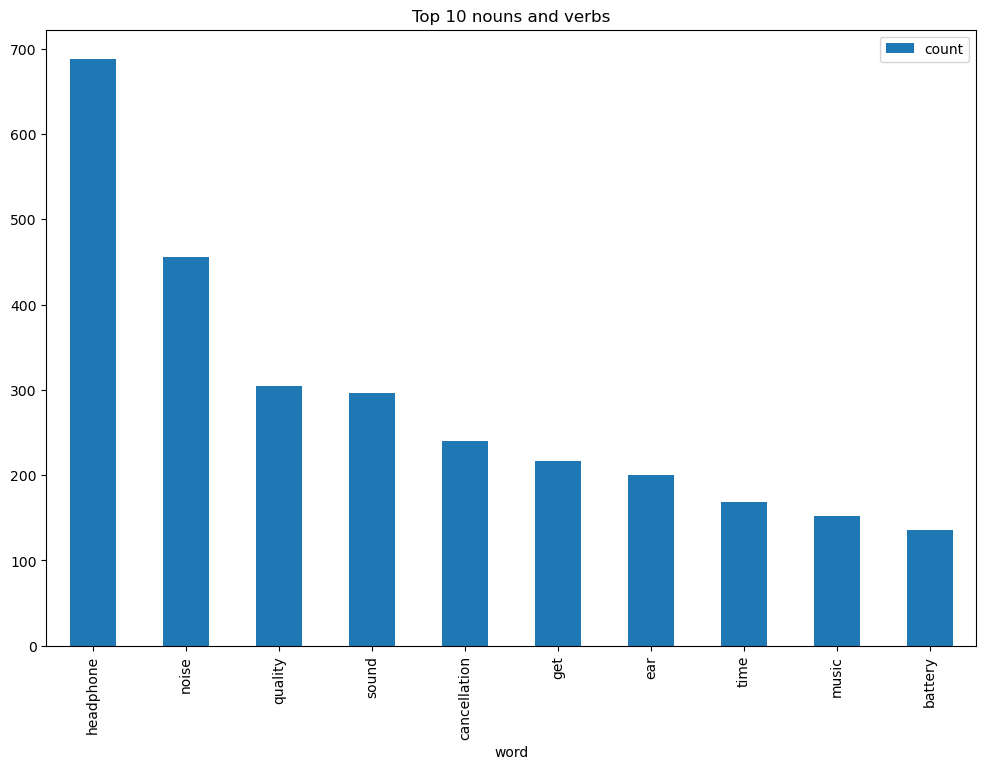

In [94]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

###### Feature Extraction

In [95]:
# BOW features
bow_word_vectorizer=CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature=bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer=TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature=tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

###### Fetch sentiments

+ Using NLTK's SentimentIntensityAnalyzer

In [96]:
def fetch_sentiment_using_SIA(text):
    sid=SentimentIntensityAnalyzer()
    polarity_scores=sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [98]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [99]:
sentiments_using_SIA=dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,80


In [100]:
dataframe.Clean_Reviews[8]

'listen music many people understand finer element composition sony wh xm surprise u give new premium feeling ear almost month purchase reviewpros sony really stand come xm series talking device give great comfort ear cushion soft wear almost hr straight even taken nap also wearing build quality pretty awesome got dropped accidentally still damage fall workout water resistant water proof drop pool fit head super easy carry heavy overhead soft cushion sound towards bass turn volume full feel vibration sensation listening punchy music great feeling coming anc king compared product price segment almost cut traffic noise mode noise cancellation set app also detect motion set anc level according nfc cool feature work android battery pretty decent last hr anc almost hr charging pretty quick make sure charge big charger w use oneplus charger bigger adapter fast charge hr full charge time con headphone case need cleaned otherwise black matte finish model get dirty pleasing treble music lover a

In [101]:
sid=SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.07, 'neu': 0.656, 'pos': 0.274, 'compound': 0.9917}

In [102]:
df=pd.DataFrame()
df['Review']=dataframe.Clean_Reviews
df['scores']=dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,audio technica ath x sennheiser hd headphone u...,"{'neg': 0.047, 'neu': 0.704, 'pos': 0.249, 'co..."
1,start review let make clear tryst noise cancel...,"{'neg': 0.069, 'neu': 0.752, 'pos': 0.178, 'co..."
2,first noise cancellation headphone expert opin...,"{'neg': 0.074, 'neu': 0.664, 'pos': 0.263, 'co..."
3,reached pm today th awesome delivery service a...,"{'neg': 0.049, 'neu': 0.711, 'pos': 0.24, 'com..."
4,bit skeptical buying reading static noise issu...,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co..."


In [103]:
df['compound']=df['scores'].apply(lambda scores: scores['compound'])

In [104]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))

In [105]:
df.head()

,Review,scores,compound,sentiment
0,audio technica ath x sennheiser hd headphone u...,"{'neg': 0.047, 'neu': 0.704, 'pos': 0.249, 'co...",0.9992,Positive
1,start review let make clear tryst noise cancel...,"{'neg': 0.069, 'neu': 0.752, 'pos': 0.178, 'co...",0.9964,Positive
2,first noise cancellation headphone expert opin...,"{'neg': 0.074, 'neu': 0.664, 'pos': 0.263, 'co...",0.9953,Positive
3,reached pm today th awesome delivery service a...,"{'neg': 0.049, 'neu': 0.711, 'pos': 0.24, 'com...",0.9982,Positive
4,bit skeptical buying reading static noise issu...,"{'neg': 0.088, 'neu': 0.691, 'pos': 0.221, 'co...",0.9957,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

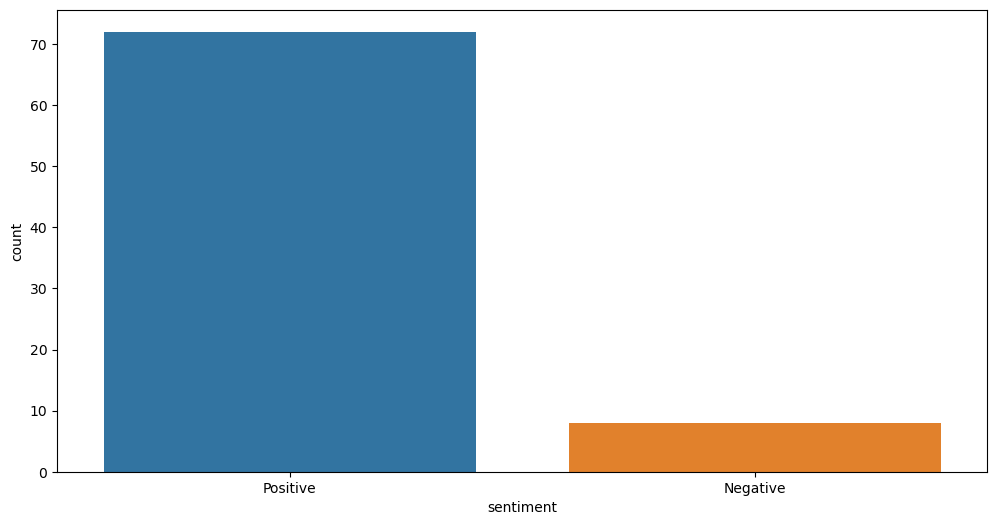

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='compound', ylabel='Density'>

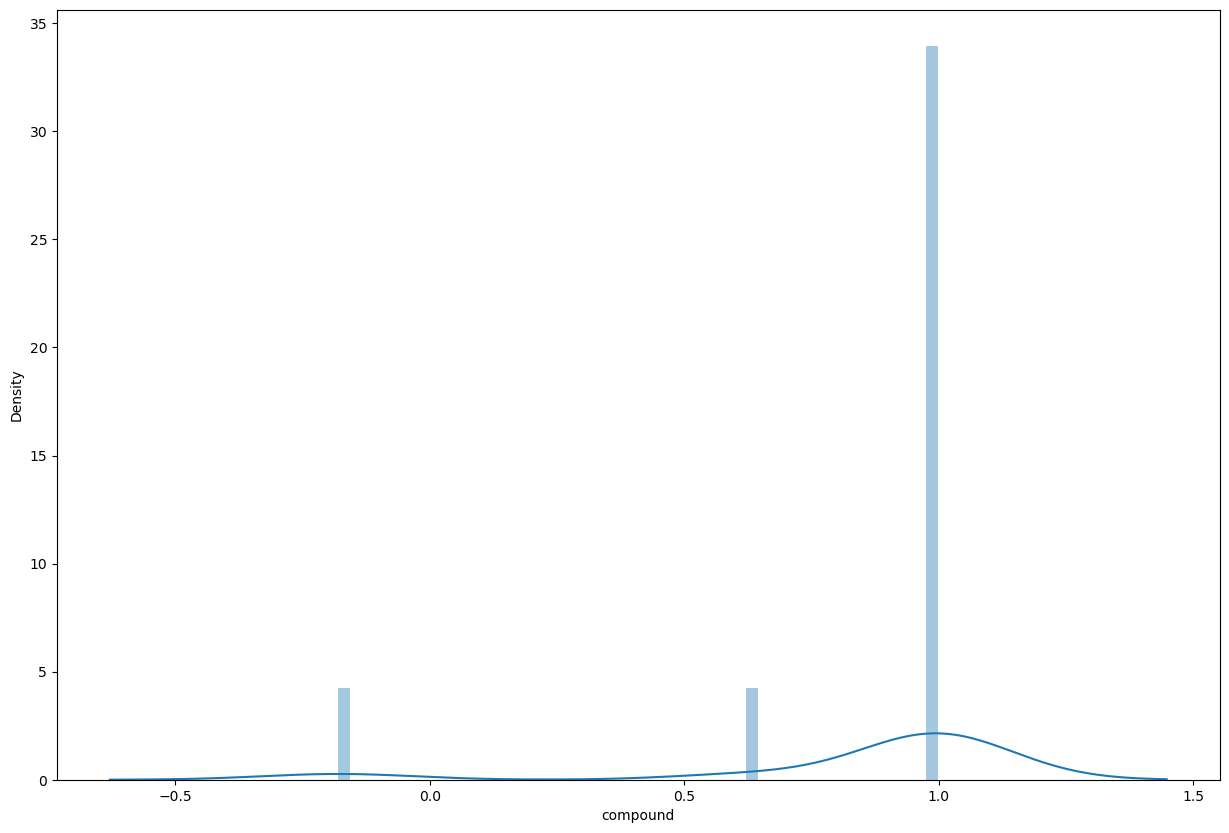

In [107]:
# Plotting the sentiment value for whole review
plt.figure(figsize=(15,10))
sns.distplot(df['compound'])

In [109]:
from wordcloud import WordCloud

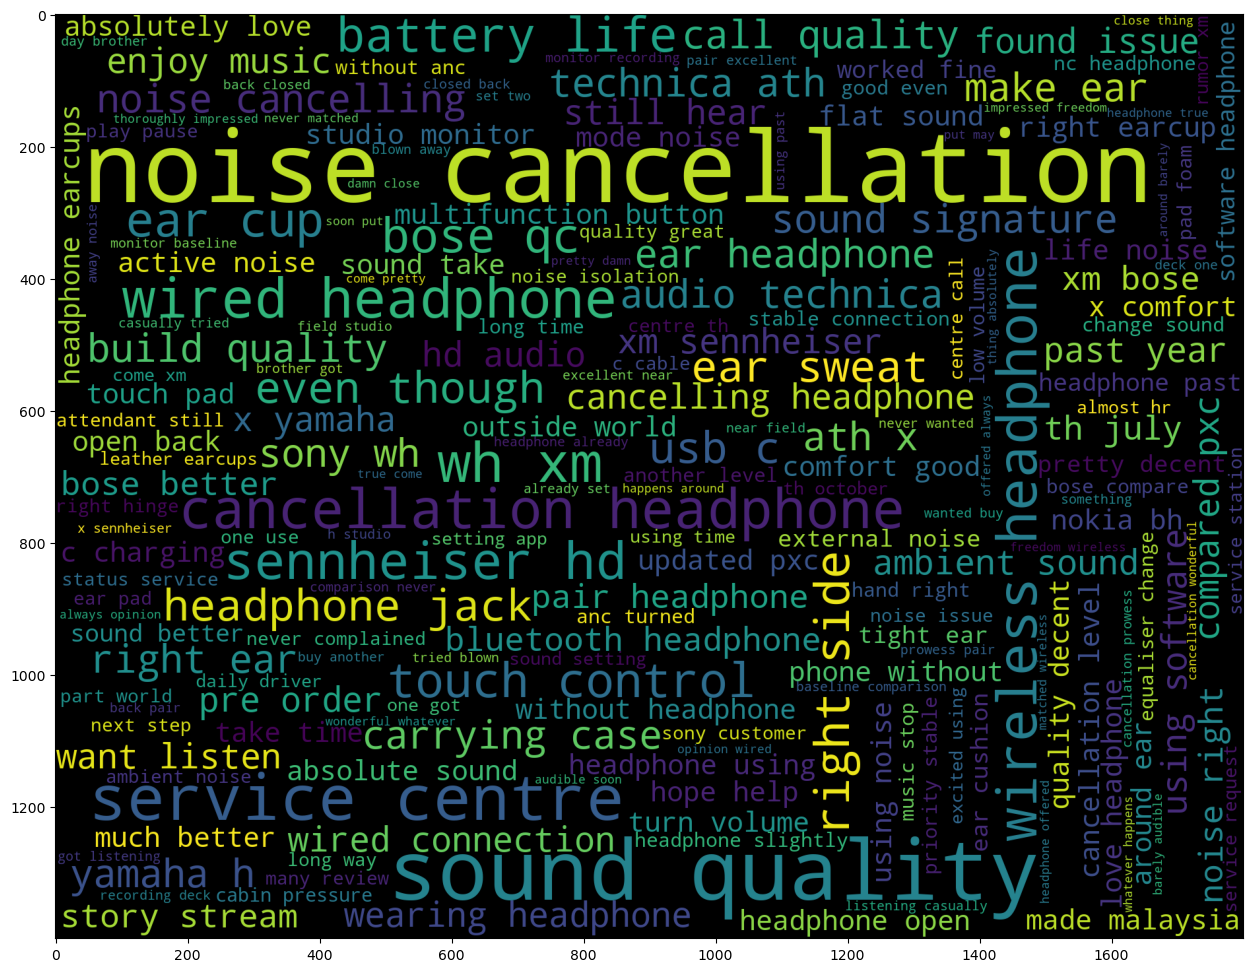

In [110]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f,axes=plt.subplots(figsize=(20,12))
wordcloud=WordCloud(
        background_color= 'black',
        width=1800,
        height=1400).generate(allWords_)
plt.imshow(wordcloud)